# Generating the result

This is an example of reconstruction using the method we proposed. The image is from the test dataset of the Helsinki Deblur Challenge, specifically from the blur category 15 with the Verdana font type. The results are generated using the weights trained exclusively on this category.

In [24]:
!python main.py example/input example/output 15

1 images were found.


# Visualizing the result

In [10]:
from utils import process
import os
import re
import matplotlib.pyplot as plt

In [ ]:
def multiplot(imgs,titles=['Ground Truth','Input','Output']):
  plt.figure(figsize=[16,8])
  for i in range(len(imgs)):
    plt.subplot(1,3,i+1)
    plt.imshow(imgs[i][0],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i])

  plt.show();

In [25]:
gt_path = 'example/focused'
in_path = 'example/input'
out_path = 'example/output'

gt_name=os.listdir(gt_path )
in_name=os.listdir(in_path)
out_name=os.listdir(out_path)

r=re.compile(".*tif|.*png")

gt_name=list(filter(r.match,gt_name))
in_name=list(filter(r.match,in_name))
out_name=list(filter(r.match,out_name))

gt_name.sort()
in_name.sort()
out_name.sort()

img_list=[]

for i in range(len(gt_name)):
  ground,_,_=process.load_img(os.path.join(gt_path,gt_name[i]),width=512,enforse_div32='EXTEND')
  input,_,_=process.load_img(os.path.join(in_path,in_name[i]),width=512,enforse_div32='EXTEND')
  output,_,_=process.load_img(os.path.join(out_path,out_name[i]),width=512,enforse_div32='EXTEND')

  img_list.append([ground,input,output])

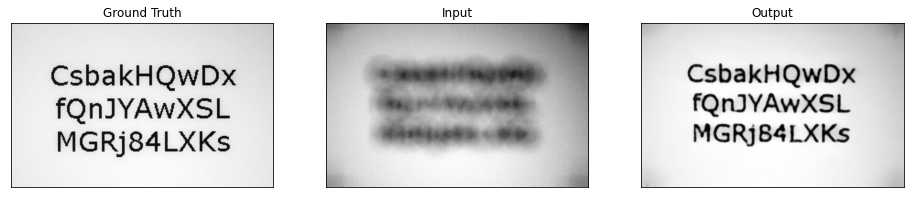

In [26]:
multiplot(img_list[0])